# Install librares

In [17]:
!pip install seaborn

You should consider upgrading via the '/Users/student/PycharmProjects/Matplotlib_Tutorial/venv/bin/python -m pip install --upgrade pip' command.


# import librares

In [18]:
import requests
from bs4 import BeautifulSoup as soup
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Get url

In [19]:
def get_content(article_name):
    return requests.get(f"https://en.wikipedia.org/wiki/{article_name}").text

In [20]:
data = get_content("Ozone_layer")
print(data)

<!DOCTYPE html>
<html class="client-nojs" lang="en" dir="ltr">
<head>
<meta charset="UTF-8"/>
<title>Ozone layer - Wikipedia</title>
<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":false,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"bc25a0fa-7cce-449d-b4e6-265d63796c3f","wgCSPNonce":false,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"Ozone_layer","wgTitle":"Ozone layer","wgCurRevisionId":1091952212,"wgRevisionId":1091952212,"wgArticleId":22834,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["CS1 maint: uses authors parameter","CS1 maint: url-status","Articles with short description","Short description is different from Wikidata","Wikipedia indefinite

# Clean Data

In [21]:
def merge_contents(data):
    content = ''
    clean = soup(data,"html.parser")
    for i in clean.find_all("p"):
        content += i.text.replace(".","").replace(",","").replace("[","").replace("]","").replace("(","").replace(")","").replace("-","").replace('–','') + ' '
    return content

In [22]:
merge_content = merge_contents(data)
print(merge_content)


 The ozone layer or ozone shield is a region of Earth's stratosphere that absorbs most of the Sun's ultraviolet  radiation It contains a high concentration of ozone O3 in relation to other parts of the atmosphere although still small in relation to other gases in the stratosphere The ozone layer contains less than 10 parts per million of ozone while the average ozone concentration in Earth's atmosphere as a whole is about 03 parts per million The ozone layer is mainly found in the lower portion of the stratosphere from approximately 15 to 35 kilometers 9 to 22 mi above Earth although its thickness varies seasonally and geographically1
 The ozone layer was discovered in 1913 by the French physicists Charles Fabry and Henri Buisson Measurements of the sun showed that the radiation sent out from its surface and reaching the ground on Earth is usually consistent with the spectrum of a black body with a temperature in the range of 55006000 K 52305730 °C except that there was no radiation b

# Tokenization

In [23]:
def tokenize(content):
    res = [i.lower() for i in content.split(" ") if i.isalpha()]
    return res

In [24]:
token = tokenize(merge_content)

In [25]:
stop_words = ['be', "the", "a", "of", "to", "in", "about", "are", "from" , "is", 
              "and", "by", "that", "was", "as", "at", "about", 'for' , 'it', 'on',
              'has', 'uv', 'cfcs', 'this', 'with', 'these', 'have',
              'or', 'an', 'were', 'which', 'can', ' into', 'because']

# Filtering

In [26]:
def remove_stop_words(words, stop_words):
  return [x for x in words if x not in stop_words]

In [27]:
filtered_collection = remove_stop_words(token, stop_words)
filtered_collection

['ozone',
 'layer',
 'ozone',
 'shield',
 'region',
 'stratosphere',
 'absorbs',
 'most',
 'ultraviolet',
 'radiation',
 'contains',
 'high',
 'concentration',
 'ozone',
 'relation',
 'other',
 'parts',
 'atmosphere',
 'although',
 'still',
 'small',
 'relation',
 'other',
 'gases',
 'stratosphere',
 'ozone',
 'layer',
 'contains',
 'less',
 'than',
 'parts',
 'per',
 'million',
 'ozone',
 'while',
 'average',
 'ozone',
 'concentration',
 'atmosphere',
 'whole',
 'parts',
 'per',
 'million',
 'ozone',
 'layer',
 'mainly',
 'found',
 'lower',
 'portion',
 'stratosphere',
 'approximately',
 'kilometers',
 'above',
 'earth',
 'although',
 'its',
 'thickness',
 'varies',
 'seasonally',
 'ozone',
 'layer',
 'discovered',
 'french',
 'physicists',
 'charles',
 'fabry',
 'henri',
 'buisson',
 'measurements',
 'sun',
 'showed',
 'radiation',
 'sent',
 'out',
 'its',
 'surface',
 'reaching',
 'ground',
 'earth',
 'usually',
 'consistent',
 'spectrum',
 'black',
 'body',
 'temperature',
 'range'

['ozone',
 'layer',
 'ozone',
 'shield',
 'region',
 'stratosphere',
 'absorbs',
 'most',
 'ultraviolet',
 'radiation',
 'contains',
 'high',
 'concentration',
 'ozone',
 'relation',
 'other',
 'parts',
 'atmosphere',
 'although',
 'still',
 'small',
 'relation',
 'other',
 'gases',
 'stratosphere',
 'ozone',
 'layer',
 'contains',
 'less',
 'than',
 'parts',
 'per',
 'million',
 'ozone',
 'while',
 'average',
 'ozone',
 'concentration',
 'atmosphere',
 'whole',
 'parts',
 'per',
 'million',
 'ozone',
 'layer',
 'mainly',
 'found',
 'lower',
 'portion',
 'stratosphere',
 'approximately',
 'kilometers',
 'above',
 'earth',
 'although',
 'its',
 'thickness',
 'varies',
 'seasonally',
 'ozone',
 'layer',
 'discovered',
 'french',
 'physicists',
 'charles',
 'fabry',
 'henri',
 'buisson',
 'measurements',
 'sun',
 'showed',
 'radiation',
 'sent',
 'out',
 'its',
 'surface',
 'reaching',
 'ground',
 'earth',
 'usually',
 'consistent',
 'spectrum',
 'black',
 'body',
 'temperature',
 'range'

# Term Frequency

In [28]:
import operator
def count_frequency(collection):
    counter = {}
    for letter in collection:
        if letter not in counter:
            counter[letter] = 0
        counter[letter] += 1
    slovar_sorted=sorted(counter.items(), key=operator.itemgetter(1), reverse=True)
    return slovar_sorted

In [29]:
counts_word = count_frequency(filtered_collection)

In [30]:
counts_word

[('ozone', 80),
 ('layer', 23),
 ('radiation', 17),
 ('ultraviolet', 13),
 ('stratosphere', 11),
 ('atmosphere', 10),
 ('surface', 9),
 ('depletion', 9),
 ('skin', 7),
 ('into', 7),
 ('most', 6),
 ('earth', 6),
 ('being', 6),
 ('used', 6),
 ('oxygen', 6),
 ('air', 6),
 ('over', 6),
 ('latitudes', 6),
 ('regulation', 6),
 ('high', 5),
 ('other', 5),
 ('parts', 5),
 ('although', 5),
 ('its', 5),
 ('out', 5),
 ('between', 5),
 ('light', 5),
 ('damage', 5),
 ('also', 5),
 ('all', 5),
 ('circulation', 5),
 ('northern', 5),
 ('compounds', 5),
 ('been', 5),
 ('risks', 5),
 ('absorbs', 4),
 ('concentration', 4),
 ('less', 4),
 ('than', 4),
 ('million', 4),
 ('while', 4),
 ('above', 4),
 ('percent', 4),
 ('near', 4),
 ('increased', 4),
 ('united', 4),
 ('atomic', 4),
 ('where', 4),
 ('very', 4),
 ('important', 4),
 ('harmful', 4),
 ('cause', 4),
 ('such', 4),
 ('effective', 4),
 ('production', 4),
 ('so', 4),
 ('may', 4),
 ('much', 4),
 ('spring', 4),
 ('levels', 4),
 ('antarctic', 4),
 ('since

[('ozone', 80),
 ('layer', 23),
 ('radiation', 17),
 ('ultraviolet', 13),
 ('stratosphere', 11),
 ('atmosphere', 10),
 ('surface', 9),
 ('depletion', 9),
 ('skin', 7),
 ('into', 7),
 ('most', 6),
 ('earth', 6),
 ('being', 6),
 ('used', 6),
 ('oxygen', 6),
 ('air', 6),
 ('over', 6),
 ('latitudes', 6),
 ('regulation', 6),
 ('high', 5),
 ('other', 5),
 ('parts', 5),
 ('although', 5),
 ('its', 5),
 ('out', 5),
 ('between', 5),
 ('light', 5),
 ('damage', 5),
 ('also', 5),
 ('all', 5),
 ('circulation', 5),
 ('northern', 5),
 ('compounds', 5),
 ('been', 5),
 ('risks', 5),
 ('absorbs', 4),
 ('concentration', 4),
 ('less', 4),
 ('than', 4),
 ('million', 4),
 ('while', 4),
 ('above', 4),
 ('percent', 4),
 ('near', 4),
 ('increased', 4),
 ('united', 4),
 ('atomic', 4),
 ('where', 4),
 ('very', 4),
 ('important', 4),
 ('harmful', 4),
 ('cause', 4),
 ('such', 4),
 ('effective', 4),
 ('production', 4),
 ('so', 4),
 ('may', 4),
 ('much', 4),
 ('spring', 4),
 ('levels', 4),
 ('antarctic', 4),
 ('since

# Visualizing

In [31]:
%matplotlib inline
def print_most_frequent(frequencies, n):
  df = pd.DataFrame.from_records(frequencies)
  df.columns = ['Frequencies', 'Total Count']
  df2 = df.head(n)
  fig, ax = plt.subplots(figsize=(16, 12))
  ax.set_facecolor("black")
  sns.set(style="whitegrid")
  sns.set_color_codes("muted")
  sns.barplot(x="Total Count", y="Frequencies", 
            data=df2).set(title='Most Common Tokens in the Ozone Layer article')

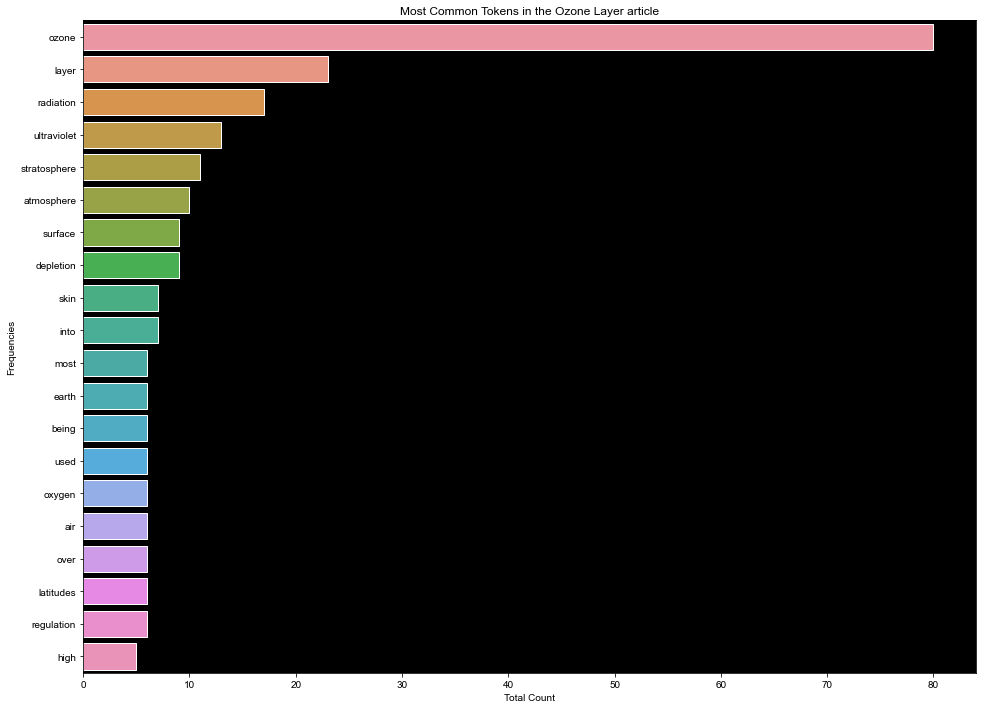

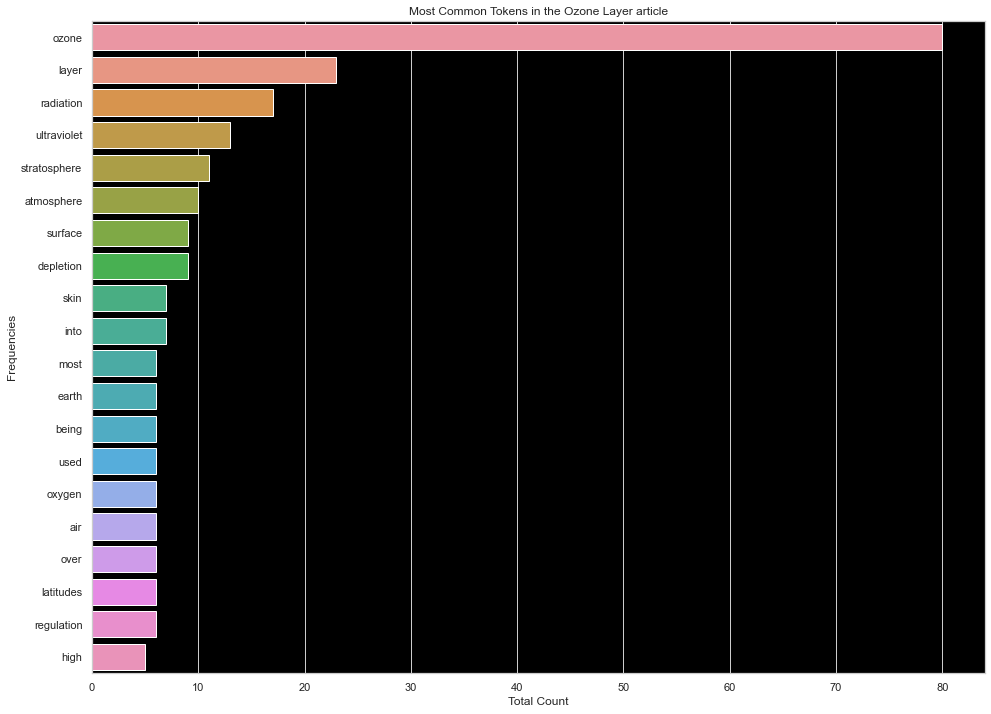

In [32]:
print_most_frequent(counts_word, 20)